In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data-homework.csv')

In [3]:
columns = ['neighbourhood_group', 'room_type', 'latitude', 'longitude',
           'price', 'minimum_nights', 'number_of_reviews',
           'reviews_per_month', 'calculated_host_listings_count',
          'availability_365']

In [4]:
df[columns].head().T

0                1             2  \
neighbourhood_group                 Brooklyn        Manhattan     Manhattan   
room_type                       Private room  Entire home/apt  Private room   
latitude                            40.64749         40.75362      40.80902   
longitude                          -73.97237        -73.98377      -73.9419   
price                                    149              225           150   
minimum_nights                             1                1             3   
number_of_reviews                          9               45             0   
reviews_per_month                       0.21             0.38           NaN   
calculated_host_listings_count             6                2             1   
availability_365                         365              355           365   

                                              3                4  
neighbourhood_group                    Brooklyn        Manhattan  
room_type                       Entire home/apt  Entire home/apt  
latitude                               40.68514         40.79851  
longitude                             -73.95976        -73.94399  
price                                        89               80  
minimum_nights                                1               10  
number_of_reviews                           270                9  
reviews_per_month                          4.64              0.1  
calculated_host_listings_count                1                1  
availability_365                            194                0

In [5]:
df[columns].isnull().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [7]:
df['neighbourhood_group'].isnull().sum()

0

In [8]:
df.neighbourhood_group.describe()

count         48895
unique            5
top       Manhattan
freq          21661
Name: neighbourhood_group, dtype: object

In [9]:
df.neighbourhood_group.mode()

0    Manhattan
dtype: object

// Q1: Manhattan

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df.shape

(48895, 16)

In [12]:
df_full_train, df_test = train_test_split(df[columns], test_size=0.2, random_state=42)

In [13]:
len(df_full_train), len(df_test)

(39116, 9779)

In [14]:
df_train, df_val = train_test_split(
    df_full_train, test_size=0.25, random_state=42)

len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
y_train = df_train.price.values
y_test = df_test.price.values
y_val = df_val.price.values

In [17]:
del df_train['price']
del df_test['price']
del df_val['price']

In [18]:
df[columns].dtypes

neighbourhood_group                object
room_type                          object
latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [19]:
numerical = ['number_of_reviews', 'reviews_per_month', 'minimum_nights',
            'latitude', 'longitude', 'calculated_host_listings_count',
            'availability_365']

categorical = ['neighbourhood_group', 'room_type']

In [20]:
from sklearn.metrics import mutual_info_score

In [21]:
def mutual_churn_info_score(score):
    return mutual_info_score(score, df_full_train.price)

In [92]:
df_mi = df_full_train[categorical].apply(mutual_churn_info_score)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

In [90]:
df_mi

MI
room_type            0.141793
neighbourhood_group  0.046058

In [23]:
df[numerical].describe()

number_of_reviews  reviews_per_month  minimum_nights      latitude  \
count       48895.000000       48895.000000    48895.000000  48895.000000   
mean           23.274466           1.090910        7.029962     40.728949   
std            44.550582           1.597283       20.510550      0.054530   
min             0.000000           0.000000        1.000000     40.499790   
25%             1.000000           0.040000        1.000000     40.690100   
50%             5.000000           0.370000        3.000000     40.723070   
75%            24.000000           1.580000        5.000000     40.763115   
max           629.000000          58.500000     1250.000000     40.913060   

          longitude  calculated_host_listings_count  availability_365  
count  48895.000000                    48895.000000      48895.000000  
mean     -73.952170                        7.143982        112.781327  
std        0.046157                       32.952519        131.622289  
min      -74.244420                        1.000000          0.000000  
25%      -73.983070                        1.000000          0.000000  
50%      -73.955680                        1.000000         45.000000  
75%      -73.936275                        2.000000        227.000000  
max      -73.712990                      327.000000        365.000000

In [24]:
df_full_train.columns

Index(['neighbourhood_group', 'room_type', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [25]:
df_full_train[numerical].corrwith(df_full_train.price)

number_of_reviews                -0.048926
reviews_per_month                -0.051978
minimum_nights                    0.042740
latitude                          0.035015
longitude                        -0.149080
calculated_host_listings_count    0.055336
availability_365                  0.080562
dtype: float64

In [26]:
df_full_train[numerical].corr()

number_of_reviews  reviews_per_month  \
number_of_reviews                        1.000000           0.584935   
reviews_per_month                        0.584935           1.000000   
minimum_nights                          -0.077860          -0.121687   
latitude                                -0.011836          -0.013809   
longitude                                0.057570           0.134401   
calculated_host_listings_count          -0.072603          -0.047368   
availability_365                         0.175428           0.165565   

                                minimum_nights  latitude  longitude  \
number_of_reviews                    -0.077860 -0.011836   0.057570   
reviews_per_month                    -0.121687 -0.013809   0.134401   
minimum_nights                        1.000000  0.025497  -0.063498   
latitude                              0.025497  1.000000   0.080704   
longitude                            -0.063498  0.080704   1.000000   
calculated_host_listings_count        0.121748  0.020299  -0.115289   
availability_365                      0.140596 -0.008341   0.082994   

                                calculated_host_listings_count  \
number_of_reviews                                    -0.072603   
reviews_per_month                                    -0.047368   
minimum_nights                                        0.121748   
latitude                                              0.020299   
longitude                                            -0.115289   
calculated_host_listings_count                        1.000000   
availability_365                                      0.223328   

                                availability_365  
number_of_reviews                       0.175428  
reviews_per_month                       0.165565  
minimum_nights                          0.140596  
latitude                               -0.008341  
longitude                               0.082994  
calculated_host_listings_count          0.223328  
availability_365                        1.000000

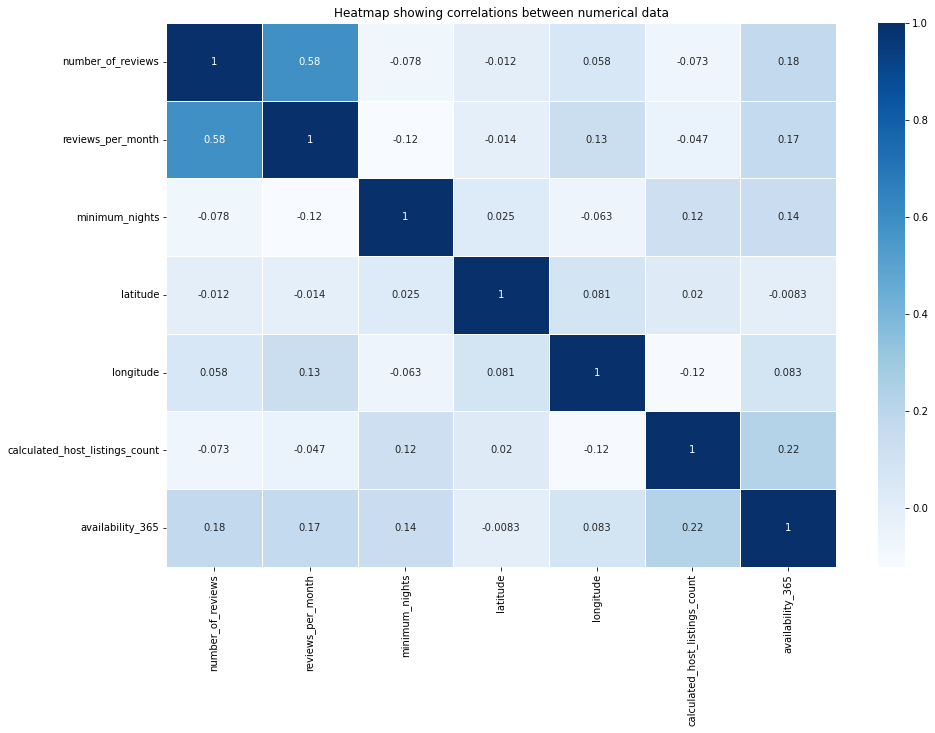

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df_full_train[numerical].corr(), annot=True, linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [28]:
df_full_train[numerical].corr().unstack().sort_values(ascending=False)

number_of_reviews               number_of_reviews                 1.000000
reviews_per_month               reviews_per_month                 1.000000
calculated_host_listings_count  calculated_host_listings_count    1.000000
longitude                       longitude                         1.000000
minimum_nights                  minimum_nights                    1.000000
latitude                        latitude                          1.000000
availability_365                availability_365                  1.000000
number_of_reviews               reviews_per_month                 0.584935
reviews_per_month               number_of_reviews                 0.584935
availability_365                calculated_host_listings_count    0.223328
calculated_host_listings_count  availability_365                  0.223328
availability_365                number_of_reviews                 0.175428
number_of_reviews               availability_365                  0.175428
reviews_per_month        

// Q3: number_of_reviews and reviews_per_month

In [29]:
mean = df_full_train.price.mean()
mean

153.75158502914408

In [30]:
(df_full_train.price > 153).sum()

11933

In [31]:
df_full_train = df_full_train.reset_index(drop=True)
copy_df_full_train = df_full_train.copy()

copy_df_full_train['above_average'] = np.where(copy_df_full_train.price >= mean,  1, 0)


In [32]:
copy_df_full_train

neighbourhood_group        room_type  latitude  longitude  price  \
0                Brooklyn  Entire home/apt  40.71577  -73.95530    295   
1               Manhattan     Private room  40.84917  -73.94048     70   
2                Brooklyn     Private room  40.68993  -73.95947     58   
3                Brooklyn  Entire home/apt  40.68427  -73.93118     75   
4                  Queens     Private room  40.74705  -73.89564     38   
...                   ...              ...       ...        ...    ...   
39111           Manhattan      Shared room  40.84650  -73.94319     60   
39112           Manhattan     Private room  40.73957  -74.00082     85   
39113           Manhattan  Entire home/apt  40.78318  -73.97372    130   
39114           Manhattan  Entire home/apt  40.77508  -73.97990    150   
39115              Queens  Entire home/apt  40.74657  -73.94555    120   

       minimum_nights  number_of_reviews  reviews_per_month  \
0                   3                 11               0.87   
1                   2                  2               0.16   
2                   2                  0               0.00   
3                   3                 87               4.91   
4                   5                 13               0.25   
...               ...                ...                ...   
39111               1                  0               0.00   
39112               2                  4               1.90   
39113              30                  1               0.34   
39114               2                 11               0.13   
39115               5                  1               0.03   

       calculated_host_listings_count  availability_365  above_average  
0                                   1                 1              1  
1                                   1                 0              0  
2                                   2                 0              0  
3                                   1               267              0  
4                                   1                 0              0  
...                               ...               ...            ...  
39111                               1                 0              0  
39112                               1                76              0  
39113                               5               261              0  
39114                               1                 2              0  
39115                               1                 0              0  

[39116 rows x 11 columns]

In [33]:
def mutual_churn_info_score(score):
    return mutual_info_score(score, copy_df_full_train.above_average)

In [34]:
copy_df_full_train[categorical].apply(mutual_churn_info_score).round(2)

neighbourhood_group    0.05
room_type              0.14
dtype: float64

// Q3: 'room_type'

In [35]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [49]:
dicts_train = df_train[categorical + numerical].to_dict(orient='records')

In [52]:
dv = DictVectorizer(sparse=False)
dv.fit(dicts_train)

X_train = dv.transform(dicts_train)

In [54]:
X_train.shape

(29337, 15)

In [55]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)

model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [74]:
df.room_type = df.room_type.str.lower().str.replace(' ', '_')
df_full_train, df_test = train_test_split(df[columns], test_size=0.2, random_state=42)

df_train, df_val = train_test_split(
    df_full_train, test_size=0.25, random_state=42)

# len(df_train), len(df_val), len(df_test)

In [75]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price.values
y_test = df_test.price.values
y_val = df_val.price.values

del df_train['price']
del df_test['price']
del df_val['price']

In [76]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

train_dict[3]

{'neighbourhood_group': 'Brooklyn',
 'room_type': 'entire_home/apt',
 'number_of_reviews': 3,
 'reviews_per_month': 0.08,
 'minimum_nights': 2,
 'latitude': 40.66448,
 'longitude': -73.99407,
 'calculated_host_listings_count': 1,
 'availability_365': 0}

In [93]:
dv = DictVectorizer(sparse=False)

dv.fit(train_dict)
X_train = dv.transform(train_dict)
X_train

array([[ 50.     ,  13.     ,  40.7276 , ...,   1.     ,   0.     ,
          0.     ],
       [  7.     ,   1.     ,  40.70847, ...,   0.     ,   1.     ,
          0.     ],
       [  0.     ,   1.     ,  40.83149, ...,   1.     ,   0.     ,
          0.     ],
       ...,
       [ 88.     ,   1.     ,  40.79994, ...,   0.     ,   1.     ,
          0.     ],
       [  0.     ,   1.     ,  40.69585, ...,   0.     ,   1.     ,
          0.     ],
       [281.     ,   2.     ,  40.64438, ...,   1.     ,   0.     ,
          0.     ]])

In [85]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [86]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred = model.predict(X_val)

y_pred

array([100, 100,  99, ..., 100, 100, 150])

In [83]:
y_val

array([ 65,  89, 200, ...,  39,  70,  77])

In [87]:
from sklearn.metrics import accuracy_score


In [88]:
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.05
